**Project Name - Restaurant Data Analysis (Level 2)**

**Project Type - DATA MANIPULATION AND FEATURE ENGINEERING**

**Industry - Cognifyz Techonologies**

**Participant Name - Swapna Devare**


**Project Summary :**

This is my Second Level internship task received from Cognifyz Technologies. In this task they provided 3 tasks on Data Manipulation and Feature Engineering.
But before these 3 taska need to reprocess the data such as Data Cleaning, Handling Missing Values and so on.

**In this Level 2 there are mainly 3 Tasks included:**

**Task 1 : Table Booking and Online Delivery** - In this task need to Manipulate and Analyse the data over features such as restaurant_id, Has_table_booking, and Has_online_delivery.

*   Determine the percentage of restaurants that
offer table booking and online delivery.
*  Compare the average ratings of restaurants
with table booking and those without.
*   Analyze the availability of online delivery
among restaurants with different price ranges.






**Task 2 : Price Range Analysis** - Explored the Price Range feature to analysed with common price range, average rating for each price, highest average rating.



*   Determine the most common price range
among all the restaurants.
*   Calculate the average rating for each price
range.
*   Identify the color that represents the highest
average rating among different price ranges.




**Task 3 : Feature Engineering** - This task were about Feature Engineering. Need to create additional columns from given attributes.



*   Extract additional features from the existing
columns, such as the length of the restaurant
name or address.
*   Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.









## **Task - 1 : Table Booking and Online Delivery**

**Import all Libraries**

In [52]:
# Importing All Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Make Connection between Notebook and Drive Dataset**

In [53]:
# First need to import (google. colab import drive) library to import Excel data from Google Drive.
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Restaurant_data.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Check for Columns and and their DataTypes**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9544 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Checkig for NULL Values**

In [55]:
# Checking the NULL Values
df.isnull().sum()


Restaurant_ID           0
Restaurant_Name         7
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price_range             0
Aggregate_rating        0
Rating color            0
Rating_text             0
Votes                   0
dtype: int64

**Handling Missing Values**

In [56]:
# Cuisines and Restaurant Name has a few Missing Rows, so these Rows are removed.
df = df.dropna(subset = ['Cuisines'])
df = df.dropna(subset = ['Restaurant_Name'])


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9535 non-null   int64  
 1   Restaurant_Name       9535 non-null   object 
 2   Country_Code          9535 non-null   int64  
 3   City                  9535 non-null   object 
 4   Address               9535 non-null   object 
 5   Locality              9535 non-null   object 
 6   Locality_Verbose      9535 non-null   object 
 7   Longitude             9535 non-null   float64
 8   Latitude              9535 non-null   float64
 9   Cuisines              9535 non-null   object 
 10  Average Cost for two  9535 non-null   int64  
 11  Currency              9535 non-null   object 
 12  Has Table booking     9535 non-null   object 
 13  Has Online delivery   9535 non-null   object 
 14  Is delivering now     9535 non-null   object 
 15  Switch to order menu  9535

**Python is case sensitive language so that without underscore column names are needed to rename**

In [58]:
# Rename the all column names.
df = df.rename(columns={"Has Online delivery": "Has_Online_delivery"})
df = df.rename(columns={"Average Cost for two": "Average_Cost_for_two"})
df = df.rename(columns={"Rating color": "Rating_color"})
df = df.rename(columns={"Switch to order menu": "Switch_to_order_menu"})
df = df.rename(columns={"Is delivering now": "Is_delivering_now"})
df = df.rename(columns={"Has Table booking": "Has_Table_booking"})

**Determine the Percentage of Restaurants that
offer Table Booking and Online Delivery.**

In [59]:
# Calculate the percentage of restaurants offering table booking
per_of_table_booking = (df['Has_Table_booking']).value_counts(normalize = True) *100
print(per_of_table_booking)

Has_Table_booking
No     87.865758
Yes    12.134242
Name: proportion, dtype: float64


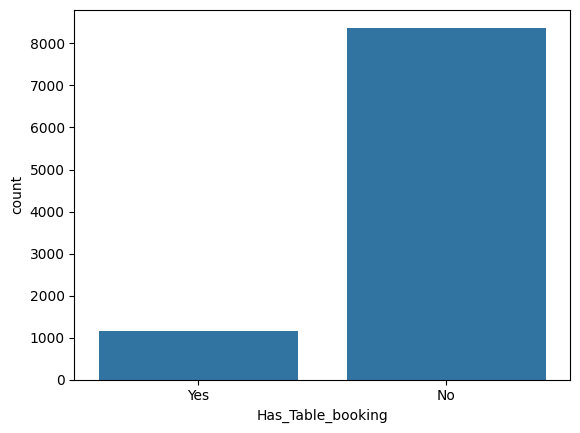

In [60]:
sns.countplot(x = df['Has_Table_booking'])
plt.show()

In [61]:
# Calculate the percentage of restaurants offering online delivery
per_of_online_delivery = (df['Has_Online_delivery']).value_counts(normalize = True) *100
print(per_of_online_delivery)

Has_Online_delivery
No     74.315679
Yes    25.684321
Name: proportion, dtype: float64


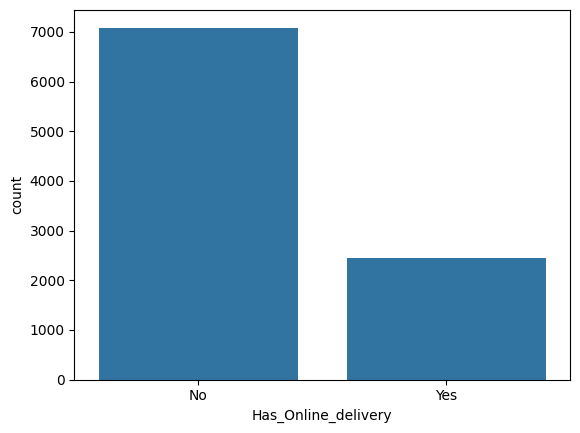

In [62]:
sns.countplot(x = df['Has_Online_delivery'])
plt.show()

**Compare the Average Ratings of Restaurants
with Table Booking and those without.**

In [63]:
# Calculate the average ratings for restaurants with and without table booking.
avg_rating_with_table_booking = df.groupby('Has_Table_booking')['Aggregate_rating'].mean()
print(avg_rating_with_table_booking)

Has_Table_booking
No     2.558033
Yes    3.441746
Name: Aggregate_rating, dtype: float64


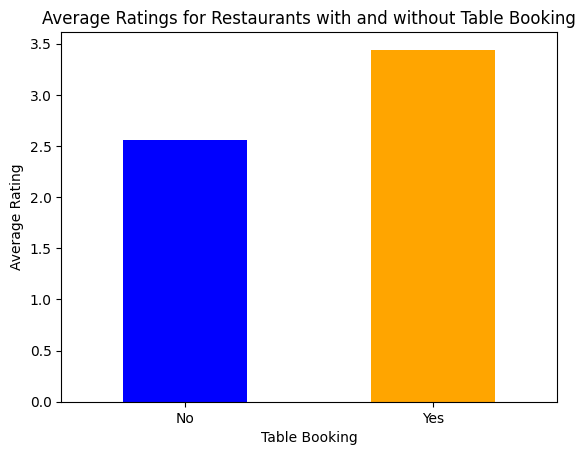

In [64]:
avg_rating_with_table_booking.plot(kind='bar', color=['blue', 'orange'])

plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Restaurants with and without Table Booking')
plt.xticks(rotation=0)
plt.show()

In [65]:
df['Aggregate_rating'].mean()

2.665264813843734

**Analyze the availability of Online Delivery
among Restaurants with different Price Ranges.**

In [66]:
available_online_delivery = df.groupby('Has_Online_delivery')['Price_range'].value_counts()
print(available_online_delivery)


Has_Online_delivery  Price_range
No                   1              3736
                     2              1825
                     3               992
                     4               533
Yes                  2              1284
                     1               701
                     3               411
                     4                53
Name: count, dtype: int64


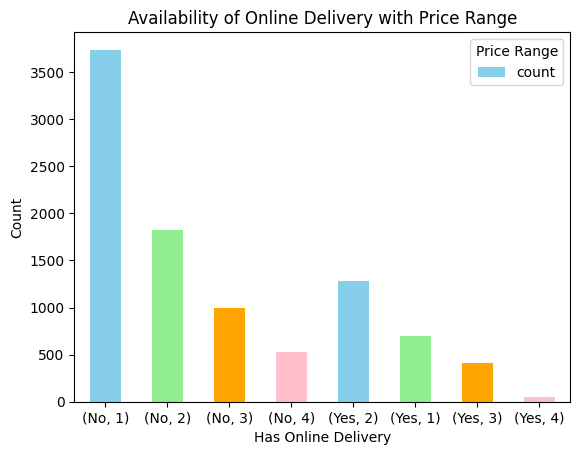

In [95]:
# Plotting the clustered bar plot
available_online_delivery.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'orange', 'pink'])

plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.title('Availability of Online Delivery with Price Range')
plt.xticks(rotation=0)
plt.legend(title='Price Range')
plt.show()

**What did I learned from this Task 1 ??**

1.   The Restaurant offers table booking for **minimum orders (12%)** and doesn't offering for rest of the orders.
2.   Online delivery is available for only **25% of total orders.**
3.   The Average Rating is **high for Table Booking Orders** than others orders which would not booked the table.
4.   Analysed the **High Orders count with No Online Delivery** than Has Online Delivery Orders.
5.    Price Range is higher for Orders **Without Online Delivery** and Lowest for **Online Orders.**









## **Task - 2 : Price Range Analysis**

**Determine the most Common Price Range
among all the Restaurants.**

In [85]:
common_price_range = df.groupby('Price_range')['Restaurant_ID'].count()
print(common_price_range)

Price_range
1    4437
2    3109
3    1403
4     586
Name: Restaurant_ID, dtype: int64


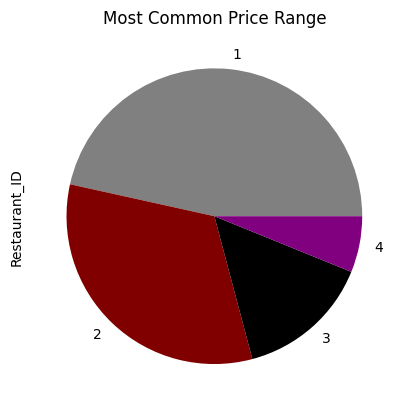

In [87]:
# Assuming 'common_price_range' is a Pandas Series with price range as index
# and count as values
common_price_range.plot(kind='pie', colors=['gray', 'maroon', 'black','purple'])

plt.title('Most Common Price Range')
plt.show()

**Calculate the Average Rating for each Price
Range.**

In [75]:
avg_rating_among_price_range = df.groupby('Price_range')['Aggregate_rating'].mean()
print(avg_rating_among_price_range)

Price_range
1    1.997927
2    2.941428
3    3.682324
4    3.817918
Name: Aggregate_rating, dtype: float64


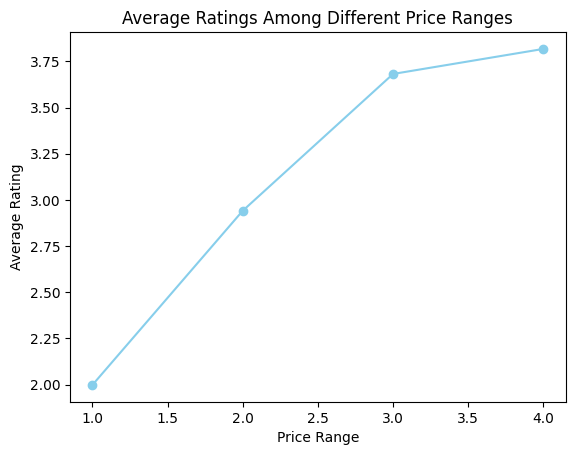

In [94]:
avg_rating_among_price_range.plot(kind='line', marker='o', color='skyblue')

plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings Among Different Price Ranges')
plt.xticks(rotation=0)
plt.show()

**Identify the color that represents the highest
average rating among different price ranges.**

In [76]:
color_identify = df.groupby(['Rating_color','Rating_text'])['Price_range'].value_counts()
print(color_identify)

Rating_color  Rating_text  Price_range
Dark Green    Excellent    3               126
                           4                74
                           2                69
                           1                31
Green         Very Good    3               414
                           2               325
                           4               194
                           1               144
Orange        Average      1              1895
                           2              1424
                           3               313
                           4               101
Red           Poor         2                98
                           1                62
                           3                20
                           4                 6
White         Not rated    1              1699
                           2               401
                           3                35
                           4                11
Yellow        Good   

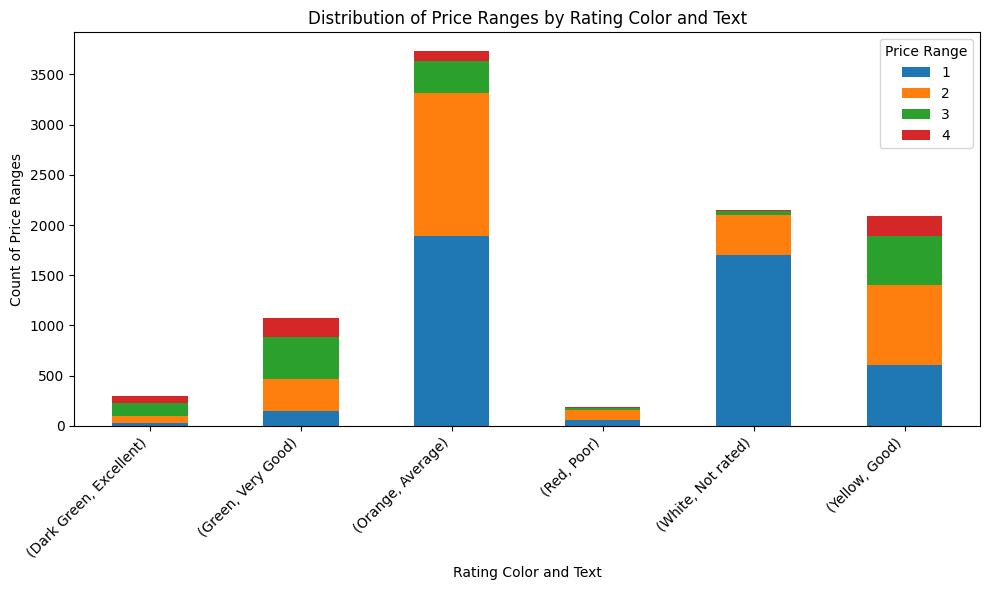

In [93]:
color_identify_unstacked = color_identify.unstack(fill_value=0)

# Plot a stacked bar chart
color_identify_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Price Ranges by Rating Color and Text')
plt.xlabel('Rating Color and Text')
plt.ylabel('Count of Price Ranges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Price Range')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**What did I learned from this Task 2 ??**

1.   The Price Range (1 and 2) appears commonly across all orders.
2.   We discovered a correlation between Aggregate Rating and Price Range. If the price is high, then the rating tends to be high for that particular order.
3.   The Dark Green color indicates an Excellent Rating with Price Ranges (3 and 4) associated with high orders. Red indicates a Poor Rating with Price Ranges (2 and 1) associated with high orders.





## **Task - 3 : Feature Engineering**

**Extract additional features from the existing
columns, such as the Length of the Restaurant
Name or Address.**

In [77]:
# Derived the additional two columns for length of Restaurant name and Address.
df['Restaurant_name_legnth'] = df['Restaurant_Name'].astype(str).apply(len)
df['Restaurant_address_length'] = df['Address'].astype(str).apply(len)

print(df['Restaurant_name_legnth'])
print(df['Restaurant_address_length'])

0       16
1       16
2        5
3        4
4       11
        ..
9546    11
9547    10
9548     5
9549     8
9550    24
Name: Restaurant_name_legnth, Length: 9535, dtype: int64
0       67
1       64
2       52
3       66
4       60
        ..
9546    90
9547    63
9548    60
9549    62
9550    56
Name: Restaurant_address_length, Length: 9535, dtype: int64


**Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.**

In [78]:
# Created new columns which encode the categorical columns data of Has Table Booking and Has Online Delivery.
df = pd.concat([df, pd.get_dummies(df['Has_Table_booking'], prefix = 'Has_Table_booking', drop_first = True)], axis = 1)
df = pd.concat([df, pd.get_dummies(df['Has_Online_delivery'], prefix = 'Has_Online_delivery', drop_first = True)], axis = 1)

**What did I learned from this Task 3 ??**

1.   Derived the additional two columns for length of Restaurant name and Address.
2.   Created new columns to encode the categorical data of Has Table Booking and Has Online Delivery.

